In [1]:
import pickle

In [2]:
#helper function for category mask
def cat(addr, labeled_addresses, dflabel):
    if addr not in labeled_addresses:
        return False
    else:
        idx = int(np.where(labeled_addresses==addr)[0][0])
        return dflabel['category'][idx]

In [3]:

cl = pickle.load(open( "pk/cl.p", "rb" ) )
clusters = pickle.load( open( "pk/clusters.p", "rb" ) )
categs = pickle.load( open( "pk/categs.p", "rb" ) )
categ = pickle.load(open( "pk/categ.p", "rb" ) )
colors = pickle.load(open( "pk/colors.p", "rb" ) )
tsne_results_3d = pickle.load(open( "pk/tsne_results_3d.p", "rb" ) )
df = pickle.load(open( "pk/df.p", "rb" ) )
dflabel = pickle.load(open( "pk/dflabel.p", "rb" ) )
labeled_addresses = pickle.load(open( "pk/labeled_addresses.p", "rb" ) )
cats = pickle.load(open( "pk/cats.p", "rb" ) )
not_subset = pickle.load(open( "pk/not_subset.p", "rb" ) )
labelmask = pickle.load(open( "pk/labelmask.p", "rb" ) )

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator KMeans from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
# First import everthing you need
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Create some random data, I took this piece from here:
# http://matplotlib.org/mpl_examples/mplot3d/scatter3d_demo.py


# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    ax.scatter(xx, yy, zz, marker='o', s=20, c="goldenrod", alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

def animate_2(i):
    ax1.view_init(elev=10., azim=i)
    ax2.view_init(elev=10., azim=i)
    return fig,

##my attempt
def v1():
    NUM_COLORS = cl.n_clusters
    cm = plt.get_cmap('nipy_spectral')
    ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


    for c in np.unique(cl.labels_):
        mask = cl.labels_==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c
        ax.scatter(tsne_results_3d[mask][:,0], tsne_results_3d[mask][:,1],tsne_results_3d[mask][:,2], alpha=.2,label=lbl)

#     leg = plt.legend(bbox_to_anchor=(1, 1))
#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)
        
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    
    return fig,

def v2():
    #plot on left side
    _, ax = fig.get_axes()
    for c in np.unique(cl.labels_):
        mask = cl.labels_==c

        if c in clusters:
            idx = clusters.index(c)
            lbl = categ[idx]
            color = colors[idx]

            ax.scatter(tsne_results_3d[mask][:,0], tsne_results_3d[mask][:,1],tsne_results_3d[mask][:,2], s=20,c=color,alpha=1,label=('Cluster {} - "{}" '.format(c,lbl) ))
        else:
            ax.scatter(tsne_results_3d[mask][:,0], tsne_results_3d[mask][:,1],tsne_results_3d[mask][:,2], c='gray',s=10, alpha=.007)
            pass
#     leg = ax.legend(bbox_to_anchor=(1, 1))
#     for lh in leg.legendHandles: 
#         lh.set_alpha(1)

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Exchange',
                              markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Mining',
                              markerfacecolor='blue', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='ICO Wallets',
                              markerfacecolor='orange', markersize=10)]


    ax.legend(handles=legend_elements, bbox_to_anchor=(1.1, .9))
    
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    ax.set_title('Labeled Clusters', fontsize=20)
    return ax,


def v3():
#     plot on right side
    ax, _ = fig.get_axes()
    
    #not labelled points
    ax.scatter(not_subset[:,0], not_subset[:,1],not_subset[:,2], s=10, c='gray', alpha=.007)

    #categories
    cats = np.array([cat(addr, labeled_addresses, dflabel) for addr in df['address']])#[address_mask] ]) #added address mask for all clusters

    # # #labelled points

    # ax = fig.add_subplot(111)
    # ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    for c in list(dflabel['category'].unique()):
        mask = dflabel['category']==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c

        #category mask
        catmask = cats == c
        if np.sum(mask) >10:
            if c in categs:
                idx=categs.index(c)
                color = colors[idx]

                ax.scatter(tsne_results_3d[(labelmask & catmask)][:,0], tsne_results_3d[(labelmask & catmask)][:,1],tsne_results_3d[(labelmask & catmask)][:,2], s=20,c=color, alpha=1,label=lbl)



    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_zticklabels([])
    ax.set_title('Crowdsourced Labels', fontsize=20)
    return ax,


def v4():
    ax1 = v2()
    ax2 = v3()
    
    return fig,

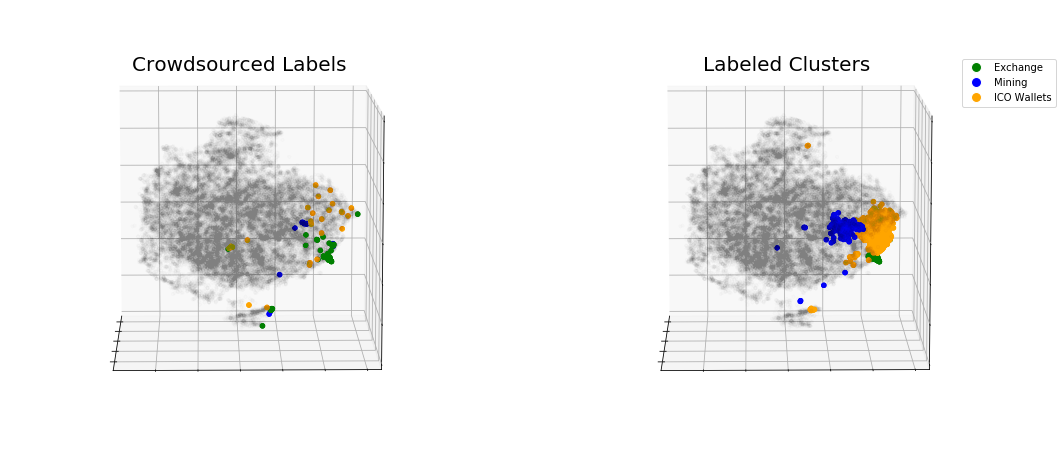

In [6]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
# Animate
anim = animation.FuncAnimation(fig, animate_2, init_func=v4,
                               frames=360, interval=20, blit=True)

# Save
anim.save('tsne_dual.mp4', fps=30, extra_args=['-vcodec', 'libx264'])